In [1]:
#libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading train and test data
Train=pd.read_csv('train.csv')
Test=pd.read_csv('test.csv')

In [3]:
#creating required dataframe
train=Train[['id','title','label']]
test=Test[['id','title']]

In [4]:
#checking missing values
train.isnull().sum()

id         0
title    558
label      0
dtype: int64

In [5]:
#removing missing data from the data
train.dropna(inplace=True)

In [6]:
train.title[1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [7]:
#rename the column 
train['target']=train['label'].rename('target')
train.drop('label',axis=1,inplace=True)
train.head()

,id,title,target
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1


In [8]:
train.title.unique()

array(['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It',
       'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart',
       'Why the Truth Might Get You Fired', ...,
       'N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times',
       'Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times',
       'NATO, Russia To Hold Parallel Exercises In Balkans'], dtype=object)

# Libraries for Text Preprocessing

In [9]:
#dependencies
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import re
from nltk.corpus import stopwords

In [10]:
#objects of dependencies
ps=PorterStemmer() #word stemmer
wnl=WordNetLemmatizer() #word stemmer
punc=string.punctuation #punctuation
stop=stopwords.words('english')  #set of stopwords

# Text Preprocessing

In [11]:
#function defining to do text preprocessing
def text_preprocess(text):
    subtext=re.sub(r'[^a-zA-Z]',' ',str(text))   #substituiting
    clean=re.sub(r'https?://\S+|www.\S+',' ',subtext)  #removing https 
    lowertext=subtext.lower()  #lowercasing
    token=lowertext.split()  #simple token to each word in doc
    nosw=[i for i in token if i not in stop] #nosw list 
    stem=[wnl.lemmatize(i) for i in nosw] #stemming each words of nosw
    return " ".join(stem) #string concat

In [12]:
#applying the function
train['clean_text']=train['title'].apply(lambda x: text_preprocess(x))

In [13]:
train[['clean_text','target']]

,clean_text,target
0,house dem aide even see comey letter jason cha...,1
1,flynn hillary clinton big woman campus breitbart,0
2,truth might get fired,1
3,civilian killed single u airstrike identified,1
4,iranian woman jailed fictional unpublished sto...,1
...,...,...
20795,rapper trump poster child white supremacy,0
20796,n f l playoff schedule matchup odds new york time,0
20797,macy said receive takeover approach hudson bay...,0
20798,nato russia hold parallel exercise balkan,1


# Data Visualization

In [14]:
#libraries
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

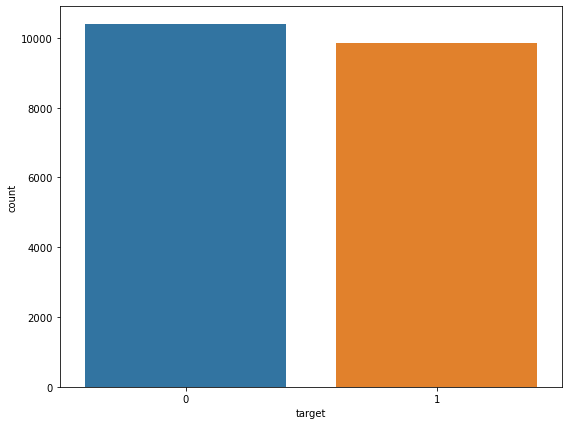

0    10387
1     9855
Name: target, dtype: int64


In [15]:
#visualizing the target 
plt.figure(figsize=(9,7))
sns.countplot(train['target'])
plt.show()
print(train['target'].value_counts())

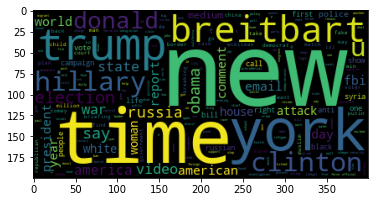

In [16]:
#wordcloud of the words in a corpus
doc=train['clean_text'].str.cat(sep=" ") #string concatination of all text in a corpus
wc=WordCloud(collocations=False, background_color='black').generate(doc) #generating wordcloud of all words  
plt.imshow(wc)
plt.show()

# Text partition and vectorization

In [17]:
#dependencies
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [18]:
#partition
x=train['clean_text'].values #independent feature
y=train['target'].values #dependent feature

In [19]:
#converting to vector
tfidf=TfidfVectorizer(max_features=6000, ngram_range=(1,3))
x1=tfidf.fit_transform(x)

In [20]:
#train and test split
x_train,x_val,y_train,y_val=train_test_split(x1,y, train_size=.95)

# Creating Modeling 

In [21]:
#libreries 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score

# Logistic Regression

In [22]:
#object
lgr=LogisticRegression(penalty='l1',C=1,solver='saga',max_iter=150)

In [23]:
#??LogisticRegression

In [24]:
model=lgr.fit(x_train,y_train)

In [25]:
y_pred=model.predict(x_val)

In [26]:
print('Accuracy rate:', accuracy_score(y_val, y_pred))
print()
print('Prec. Score:', precision_score(y_val, y_pred))
print()
print('Conf. matrx:\n', confusion_matrix(y_val, y_pred))

Accuracy rate: 0.9378084896347483

Prec. Score: 0.8983666061705989

Conf. matrx:
 [[455  56]
 [  7 495]]


In [27]:
def check(text):
    cleaned_text = text_preprocess(text)
    doc = pd.Series(cleaned_text)
    final_text = tfidf.transform(doc).toarray()
    pred = lgr.predict(final_text.reshape(1,-1))
    
    if pred==0:
        print("It's a True News")
    
    else:
        print("It's a Fake News")

In [28]:
predict_news("House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It")

NameError: name 'check' is not defined

# Multinomial 

In [ ]:
mnb=MultinomialNB(alpha=10,fit_prior=False, class_prior=None)

In [ ]:
#??MultinomialNB

In [ ]:
modelm=mnb.fit(x_train,y_train)
y_predm=modelm.predict(x_val)
print('Accuracy rate :', accuracy_score(y_val, y_predm))
print()
print('Prec. Score :', precision_score(y_val, y_predm))
print()
print('Conf. matrx : \n', confusion_matrix(y_val, y_predm))

In [ ]:
nltk.download()